<a href="https://colab.research.google.com/github/kalc1/CIT-99-Machine-Learning/blob/main/Week%205%20Regression%20Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression Project

The time is now! It's up to you to help a poor waiter maximising his/her's tip in your first project. You will use the data collected by a waiter about each tip received over a period of a few months working in one restaurant. In total, he/she recorded 244 tips.

## Part 0 - Importing the Dataset

In [1]:
# RUN THIS CELL!

# Non-sklearn packages
import numpy as np
import pandas as pd
from seaborn import load_dataset

# Import the tips dataset
tips = load_dataset("tips")

## Part 1 - Explore the Dataset

In this part you should explore the dataset to understand it better. Maybe a simple place to start is with the Pandas' `.head()` command? Other commands that you can try is:
 - `.info()` - Check for missing values?
 - `.describe()` - Find means, medians, etc.
 - Let's also do some plotting. For example, does it seems like females tip more than males? Give a plot that shows whether or not this is the case.
 - Also try to plot a scatter plot of the `total_bill` column and the `tip` column. Does it seem to be a strong relation between these columns?

In [3]:
# Check out the five first rows in the tips dataset
tips.head()


,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [13]:
# Looking at summery statistics
tips.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [14]:
# Check that there are no missing values
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


array([<Axes: title={'center': 'Male'}>,
       <Axes: title={'center': 'Female'}>], dtype=object)

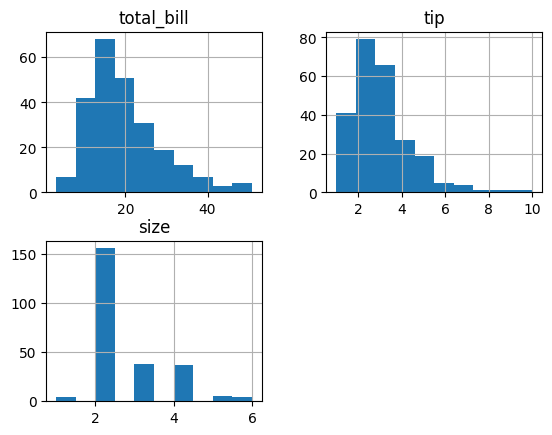

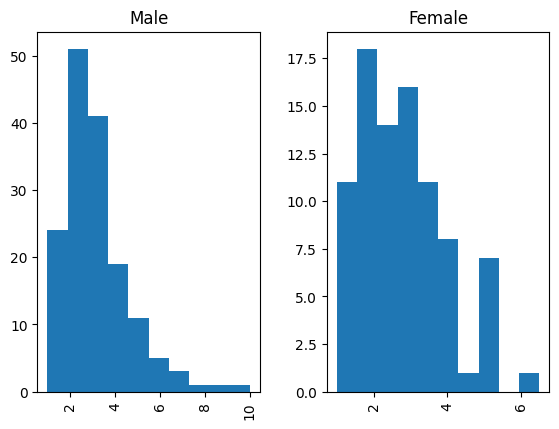

In [15]:
# Histogram plot
tips.hist()
tips.hist(column = 'tip', by = 'sex')

<Axes: xlabel='total_bill', ylabel='tip'>

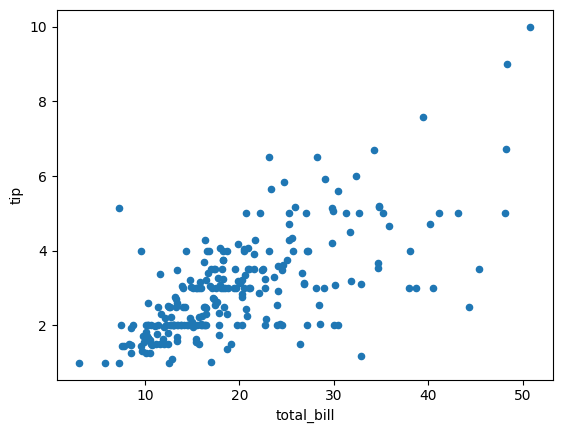

In [16]:
# Scatter plot
tips.plot.scatter(x="total_bill", y="tip")

## Part 2 - Preprocessing

In this part we need to get the data ready for machine learning models. Since there are no missing values, we are left with converting the categorical data to numerical data. After this, we need to split the data into training sets and testing sets.
 - Convert the categorical columns (smoker, sex, day, time) into numercal columns with the `.replace()` method. For the `day` column, you can split it into the weekend days, and the non-weekend days. (Hint: Remember to drop the old columns before proceeding)
 - Check out the correlation between the columns. Delete the column with the smallest correlation with `tip`.
 - Separate the dataset into a target column (`tip`) and feature columns, and then split them into training and testing sets.

In [17]:
# Figure out category data
print(tips['smoker'])
print(tips['day'])
print(tips['sex'])
print(tips['time'])

0       No
1       No
2       No
3       No
4       No
      ... 
239     No
240    Yes
241    Yes
242     No
243     No
Name: smoker, Length: 244, dtype: category
Categories (2, object): ['Yes', 'No']
0       Sun
1       Sun
2       Sun
3       Sun
4       Sun
       ... 
239     Sat
240     Sat
241     Sat
242     Sat
243    Thur
Name: day, Length: 244, dtype: category
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']
0      Female
1        Male
2        Male
3        Male
4      Female
        ...  
239      Male
240    Female
241      Male
242      Male
243    Female
Name: sex, Length: 244, dtype: category
Categories (2, object): ['Male', 'Female']
0      Dinner
1      Dinner
2      Dinner
3      Dinner
4      Dinner
        ...  
239    Dinner
240    Dinner
241    Dinner
242    Dinner
243    Dinner
Name: time, Length: 244, dtype: category
Categories (2, object): ['Lunch', 'Dinner']


In [18]:
# Converting the categories into numerical values
tips["smoker"] = tips["smoker"].replace({"No": 0, "Yes": 1})
tips["is_weekend"] = tips["day"].replace({"Thur": 0, "Fri": 0, "Sat": 1, "Sun": 1})
tips["is_female"] = tips["sex"].replace({"Male": 0, "Female": 1})
tips["is_dinner"] = tips["time"].replace({"Lunch": 0, "Dinner": 1})

In [19]:
# Drop the old categorical columns
drop_these = ["sex", "day", "time"]
tips.drop(columns = drop_these, inplace=True)

In [20]:
# Check out the corrlation of the columns
tips.corr()

<ipython-input-20-8db881780d4a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  tips.corr()


,total_bill,tip,size
total_bill,1.000000,0.675734,0.598315
tip,0.675734,1.000000,0.489299
size,0.598315,0.489299,1.000000


In [21]:
# Remove the smoker column
tips.drop(columns=["smoker"], inplace=True)

In [22]:
# Separate the features and the target (tip)
y = tips["tip"]
X = tips.drop(columns=["tip"])

In [23]:
# Import the train_test_split function
from sklearn.model_selection import train_test_split

In [24]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

## Part 3 - Machine Learning

Now we are at the last step. Train a regression machine learning model and check how well it does on the data. What is the error you get?

- (Pro) Put you machine learning model into a pipeline where you also scale the data.
- (Mega Pro) Compare two different machine learning models to see which one peforms the best.

In [25]:
# Relevant imports
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_absolute_error

In [26]:
# Create linear regression model (or pipeline)
lin_reg_pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [27]:
# Fitting the model (or pipeline)
lin_reg_pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [28]:
# Find the absolute error of the linear regression model
y_pred = lin_reg_pipe.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.6803474630555354

In [29]:
# Create polynomial regression model (or pipeline)
poly_pipe = Pipeline([
    ("poly", PolynomialFeatures(degree=2, interaction_only=True)),
    ("scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [30]:
# Fitting the model (or pipeline)
poly_pipe.fit(X_train, y_train)

Pipeline(steps=[('poly', PolynomialFeatures(interaction_only=True)),
                ('scaler', StandardScaler()), ('lin_reg', LinearRegression())])

In [31]:
# Finding the absolute error of the polynomial regression model
y_pred = poly_pipe.predict(X_test)
mean_absolute_error(y_pred, y_test)

0.7658741715240085